# Predict data science job salary with linear regression

## Load salary data
Dataset comes from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) where the uploader in turn credits [ai-jobs.net](ai-jobs.net) for aggregating the data

In [3]:
import os
import pandas as pd
import numpy as np

SALARIES_PATH = os.path.join("datasets", "archive")

def load_salaries_data(salaries_data_path=SALARIES_PATH):
    csv_path = os.path.join(salaries_data_path, "ds_salaries.csv")
    return pd.read_csv(csv_path)

In [4]:
ds_salaries = load_salaries_data()
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
ds_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## Look at value counts of categorical features
Get a feel for how representative the data is by looking at how many instances of each category each categorical feture has

In [7]:
ds_salaries["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Most of the instances belong to 4 categories and the rest of the categories have less than 20 instances. Also there are many titles that appear extremely similar and we have no role descriptions to discern or associate them further.

In [8]:
ds_salaries["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

All employment types except for full-time (FT) have no more than 10 instances

In [9]:
ds_salaries["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Here only the expert category (EX) has significantly less examples than the rest

In [10]:
ds_salaries["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [11]:
ds_salaries["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

## Visualize data

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

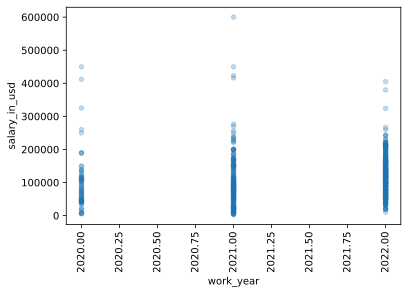

In [12]:
ds_salaries.plot(kind="scatter", x="work_year", y="salary_in_usd",
             alpha=0.25, rot=90)

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

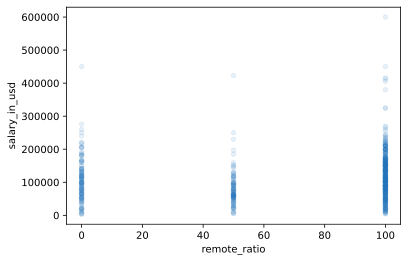

In [13]:
ds_salaries.plot(kind="scatter", x="remote_ratio", y="salary_in_usd",
             alpha=0.1)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

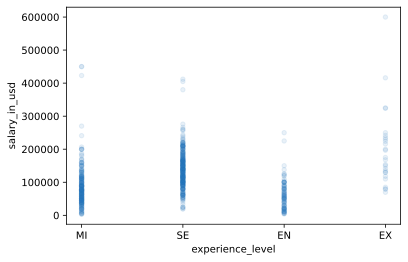

In [14]:
ds_salaries.plot(kind="scatter", x="experience_level", y="salary_in_usd",
             alpha=0.1)

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

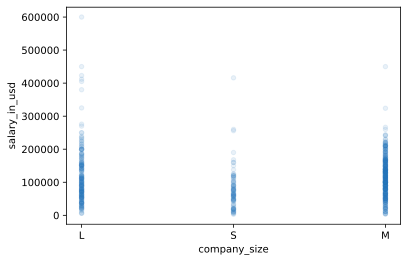

In [15]:
ds_salaries.plot(kind="scatter", x="company_size", y="salary_in_usd",
             alpha=0.1)

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

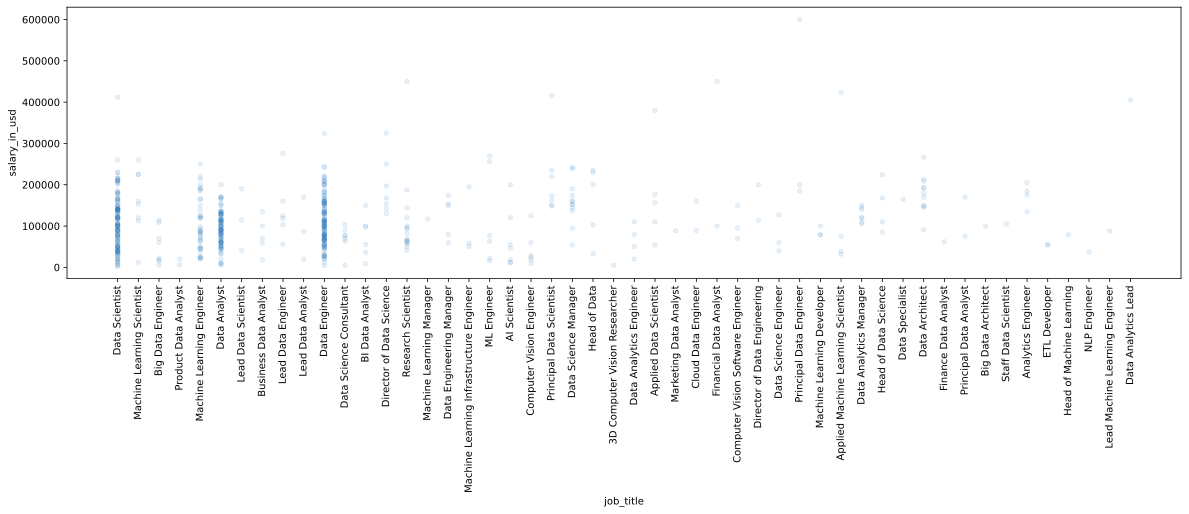

In [16]:
ds_salaries.plot(kind="scatter", x="job_title", y="salary_in_usd",
             alpha=0.1, figsize=(20,5), rot=90)

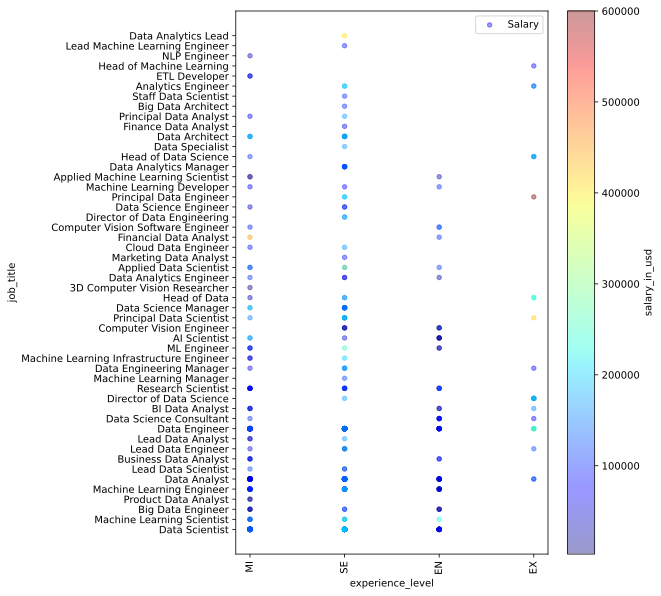

In [17]:
import matplotlib.pyplot as plt
ds_salaries.plot(kind="scatter", x="experience_level", y="job_title", alpha=0.4,
             label="Salary", figsize=(7,10), c="salary_in_usd", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False, rot=90)
plt.legend()

In [18]:
# Inspect salary outliers
ds_expensive = ds_salaries[ds_salaries["salary_in_usd"] > 300000]
ds_expensive.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L


In [19]:
ds_expensive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 25 to 523
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10 non-null     int64 
 1   work_year           10 non-null     int64 
 2   experience_level    10 non-null     object
 3   employment_type     10 non-null     object
 4   job_title           10 non-null     object
 5   salary              10 non-null     int64 
 6   salary_currency     10 non-null     object
 7   salary_in_usd       10 non-null     int64 
 8   employee_residence  10 non-null     object
 9   remote_ratio        10 non-null     int64 
 10  company_location    10 non-null     object
 11  company_size        10 non-null     object
dtypes: int64(5), object(7)
memory usage: 1.0+ KB


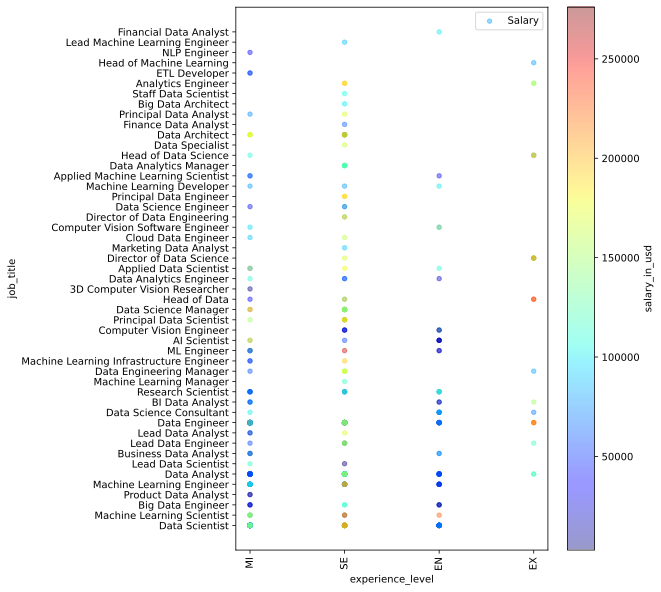

In [20]:
ds_cheap = ds_salaries.drop(ds_expensive.index)
ds_cheap.plot(kind="scatter", x="experience_level", y="job_title", alpha=0.4,
             label="Salary", figsize=(7,10), c="salary_in_usd", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False, rot=90)
plt.legend()

## Clean data

In [21]:
# The first column in the data set are the row indices and thus is not needed
columns_to_delete = ds_salaries.columns[[0]]
ds_salaries_clean = ds_salaries.drop(columns_to_delete, axis=1)

ds_salaries_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
# Remove the rows that have something other that full-time (FT) as employment type
ds_salaries_clean = ds_salaries_clean.drop(ds_salaries_clean[ds_salaries_clean["employment_type"] != "FT"].index)
ds_salaries_clean["employment_type"].value_counts()

FT    588
Name: employment_type, dtype: int64

In [23]:
# Remove the rows that have EX as experience level
ds_salaries_clean = ds_salaries_clean.drop(ds_salaries_clean[ds_salaries_clean["experience_level"] == "EX"].index)
ds_salaries_clean["experience_level"].value_counts()

SE    278
MI    206
EN     79
Name: experience_level, dtype: int64

In [24]:
# Remove outliers with salaries above 300k
ds_salaries_clean = ds_salaries_clean.drop(ds_salaries_clean[ds_salaries_clean["salary_in_usd"] > 300000].index)
ds_salaries_clean.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,557.000000,5.570000e+02,557.000000,557.000000
mean,2021.421903,3.258409e+05,106698.445242,70.377020
std,0.688880,1.593125e+06,56856.654577,41.253315
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,7.000000e+04,62726.000000,50.000000
50%,2022.000000,1.129000e+05,100000.000000,100.000000
75%,2022.000000,1.600000e+05,146000.000000,100.000000
max,2022.000000,3.040000e+07,276000.000000,100.000000


In [25]:
# Remove job titles with less than 40 instances
ds_salaries_clean = ds_salaries_clean.groupby("job_title").filter(lambda x: len(x) > 40)
ds_salaries_clean["job_title"].value_counts()

Data Scientist               139
Data Engineer                125
Data Analyst                  94
Machine Learning Engineer     41
Name: job_title, dtype: int64

## Prepare features for model fitting

In [26]:
predictor_names = ["job_title", "experience_level", "remote_ratio", "company_size"]
data = ds_salaries_clean[predictor_names]

target_name = "salary_in_usd"
target = ds_salaries_clean[target_name]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 605
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         399 non-null    object
 1   experience_level  399 non-null    object
 2   remote_ratio      399 non-null    int64 
 3   company_size      399 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.6+ KB


In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

experience_preprocessor = OrdinalEncoder(categories=[['EN', 'MI', 'SE']])
comp_size_preprocessor = OrdinalEncoder(categories=[['S', 'M', 'L']])
nominal_preprocessor = OneHotEncoder()
numerical_preprocessor = StandardScaler()

In [28]:
from sklearn.compose import ColumnTransformer

exp_attributes = ["experience_level"]
size_attributes = ["company_size"]
nom_attributes = ["job_title"]
num_attributes = ["remote_ratio"]

preprocessor = ColumnTransformer([
    ('experience-encoder', experience_preprocessor, exp_attributes),
    ('company-size-encoder', comp_size_preprocessor, size_attributes),
    ('one-hot-encoder', nominal_preprocessor, nom_attributes),
    ('standard_scaler', numerical_preprocessor, num_attributes)])

data_prepared = preprocessor.fit_transform(data)

## Separate into train and test data

In [29]:
from sklearn.model_selection import train_test_split

# Separate instances into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=0.2, random_state=424)

## Fit linear regression

In [30]:
from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model
reg.fit(X_train, y_train)

LinearRegression()

## Check performace

In [31]:
from sklearn.metrics import mean_absolute_error

# Performance on training data
predicted_y = reg.predict(X_train)
mean_absolute_error(y_train, predicted_y)

34289.421700967636

In [32]:
from sklearn.metrics import mean_absolute_error

# Performance on test data
predicted_y = reg.predict(X_test)
test_mae = mean_absolute_error(y_test, predicted_y)

In [33]:
print("Info on the model:")
print(f"This linear regression model has a MAE of {test_mae}")
print(f"and it's coefficients are: {reg.coef_}")

Info on the model:
This linear regression model has a MAE of 37741.870764043844
and it's coefficients are: [ 38987.02081351   6249.5177881  -13432.81871114   4183.51130506
   4663.62307498   4585.6843311    4481.6341892 ]


In [34]:
# See some predictions and the actual salaries
some_data = data_prepared[:10]
some_labels = target.iloc[:10]
print("Predictions:", np.round(reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [ 91333. 135554.  44873.  96644.  39847.  91333.  46096.  83860.  78548.
  49990.]
Labels: [79833, 150000, 72000, 35735, 51321, 40481, 39916, 85000, 8000, 41689]


## Try a desicion tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)

# Fit model
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [36]:
from sklearn.metrics import mean_absolute_error

# Performance on training data
predicted_y = treereg.predict(X_train)
mean_absolute_error(y_train, predicted_y)

25449.02954480928

In [37]:
from sklearn.metrics import mean_absolute_error

# Performance on test data
predicted_y = treereg.predict(X_test)
mean_absolute_error(y_test, predicted_y)

39139.452492278964

In [38]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [39]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 10, 15, 20, 25]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  37673
Max leaf nodes: 10  		 Mean Absolute Error:  36635
Max leaf nodes: 15  		 Mean Absolute Error:  37471
Max leaf nodes: 20  		 Mean Absolute Error:  37871
Max leaf nodes: 25  		 Mean Absolute Error:  39061
